In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# loading the dataset
Boston_df = pd.read_csv("BostonHousing.csv")
Boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
Boston_df.shape

(506, 14)

In [4]:
Boston_df.size

7084

# `Data Exploratory Analysis` (EDA)
in this EDA i will be trying to look at the following 
 * what questions are i trying to solve?
 * what kind of data do i have and how do i treat it?
 * what missing value from the data and how do you deal with it?
 * where are the outliers and why should you care about them?

## what Question am i trying to solve ?
* i am building a model to predict the price of house in Boston 

In [5]:
# changin the Medv in the column to the Target/dependent variable
Boston_df.rename(columns = {"medv":"target"}, inplace = True)

In [6]:
Boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
Boston_df.target.value_counts()

target
50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: count, Length: 229, dtype: int64

In [8]:
Boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
# checking for missing values
Boston_df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
target     0
dtype: int64

In [10]:
# giving a summary of my Data
Boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
# checking for outlier
Boston_df.age.value_counts()

age
100.0    43
95.4      4
96.0      4
98.2      4
97.9      4
         ..
58.4      1
74.4      1
73.4      1
33.1      1
89.3      1
Name: count, Length: 356, dtype: int64

### According to the Dict of the data both Crim(crime rate per capital of the town and zn: which is the proportion of the land which will be manage in the dataset)

In [12]:
# comparing each column with the target columns
Boston_df.chas.value_counts()

chas
0    471
1     35
Name: count, dtype: int64

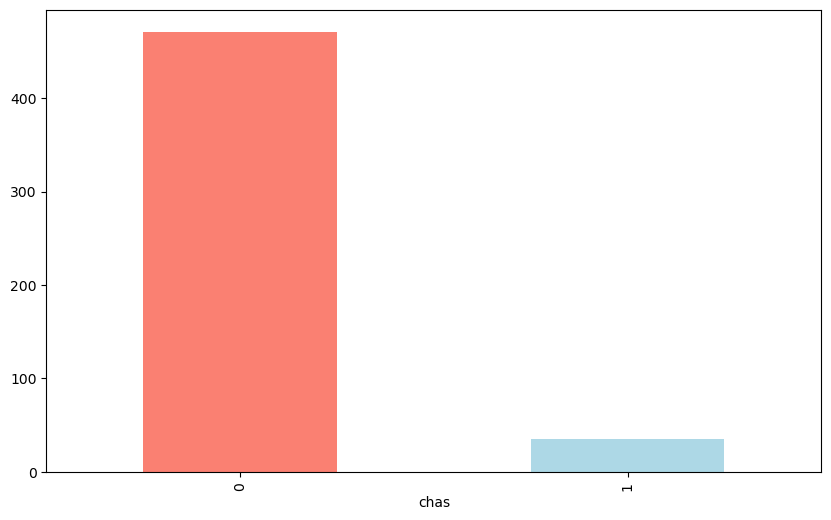

In [13]:
#plt.bar(Boston_df['chas'].value_counts().index, Boston_df['chas'].value_counts())
Boston_df.chas.value_counts().plot(kind="bar",
                                   figsize = (10,6),
                                   color = (["salmon","lightblue"]));

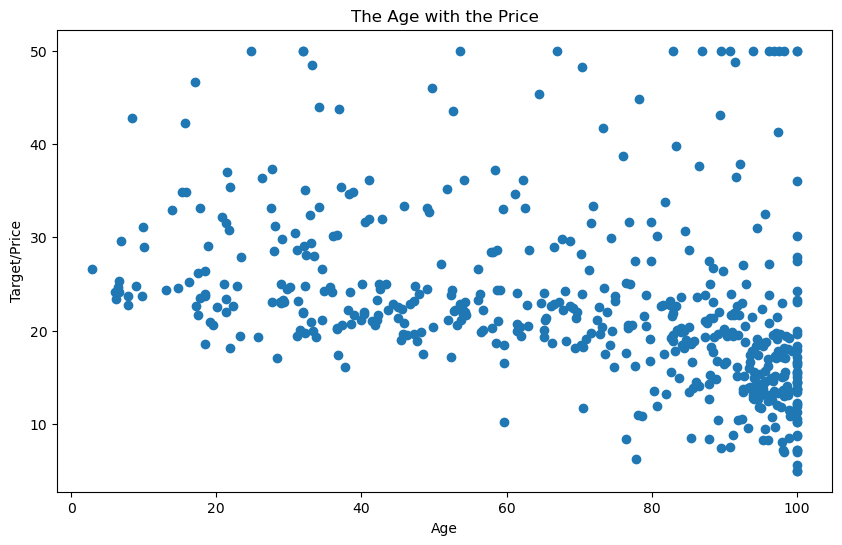

In [14]:
# comparing the age to the price target
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(x = Boston_df["age"],y = Boston_df["target"])

ax.set(title= "The Age with the Price",
      xlabel= "Age",
      ylabel = "Target/Price");

This is indicating that from the least Age the price of the House increasing around that 30 and fall around the 40 but keeps increasing after that

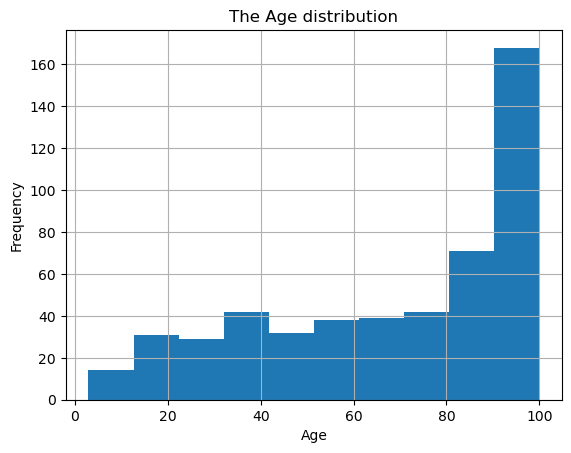

In [15]:
# let us look at the distribution of the Age 
Boston_df.age.hist()

plt.title ("The Age distribution")
plt.xlabel("Age")
plt.ylabel("Frequency");

This is a right symetrical curve whereby the distribution is more which the age of 100

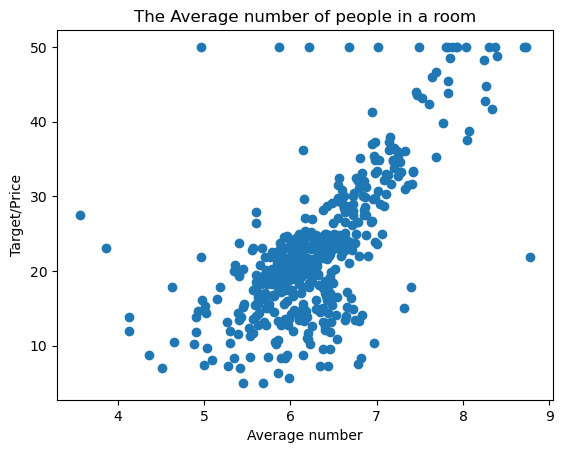

In [16]:
# looking at the average number of room by dwell
fig,ax= plt.subplots()
ax.scatter(x= Boston_df["rm"],y= Boston_df["target"])

ax.set(title= "The Average number of people in a room",
      xlabel= "Average number",
      ylabel = "Target/Price");

The average number of people dwelling in a place keep increasing with the price mostly from 3 to 8

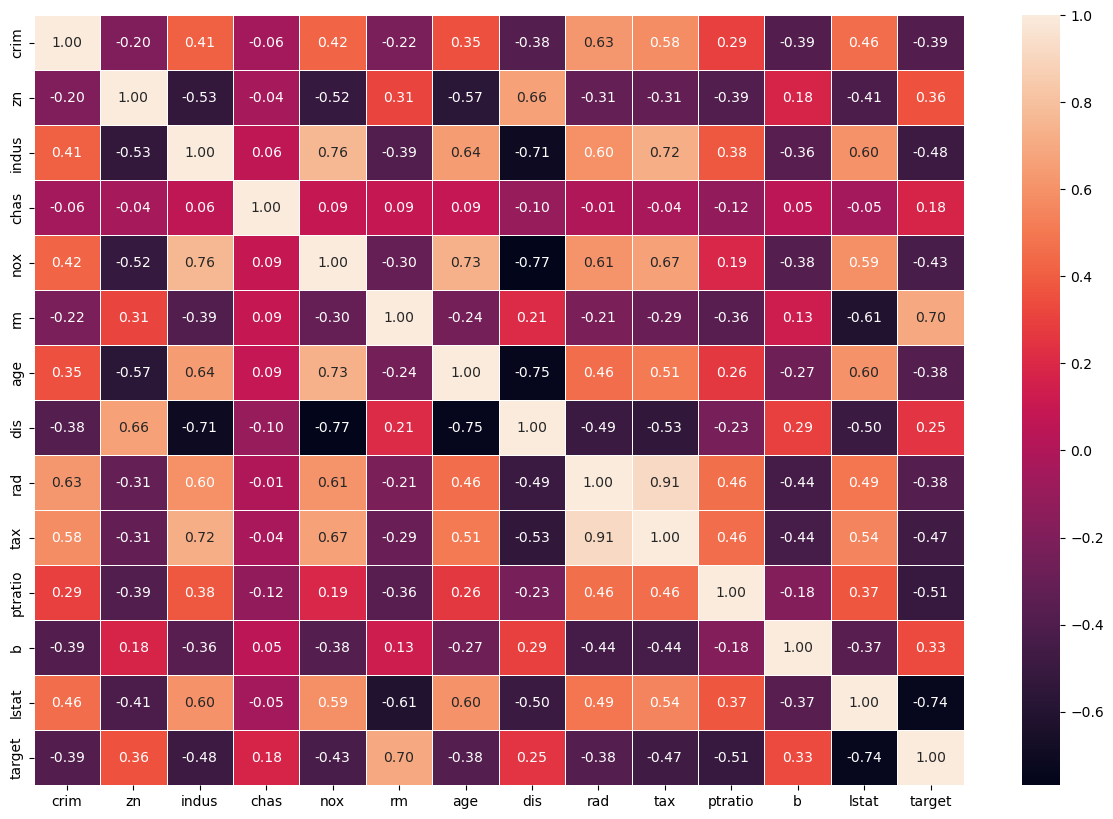

In [17]:
# Makin a correlation matrix
corr_matrix = Boston_df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot= True, fmt=".2f",linewidth= 0.5)

The only column that correlate with my target is Rm which is average person dwelling in a room

In [18]:
# Make the Data
X = Boston_df.drop("target", axis=1)
y = Boston_df["target"]

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [20]:
# test_train_ split 
np.random.seed(42)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,
                                                 y,
                                                 test_size = 0.2)

Building a machine learning model 
* linear model regression
* ridge regression
* random forest regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error
import timeit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error

In [22]:
model = {"linear regression" : LinearRegression(),
          "ridge regression" : Ridge(),
          "Random regressor" : RandomForestRegressor(n_estimators=100)}

In [23]:
def fit_and_score(model,X_train,X_test,y_train,y_test):
    """
    fit and evaluate given machine learning models 
    models : a dict of different sklearn model
    X_train : trained data (no label)
    X_test : test data (no label)
    y_train : train data(label)
    y_test : test data (label)
    """
    np.random.seed(42)
    # make ta dictionary to keep model scores
    model_scores = {}
    model_predictions = {}
    #results = []
    # loop through each model
    for name, model in model.items():
        model.fit(X_train,y_train)
        # evaluate the model and append the score
        model_scores[name] = model.score(X_test,y_test)
     
     
    return model_scores


In [24]:
Model_scores = fit_and_score(model = model,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test
                            )
Model_scores

{'linear regression': 0.6687594935356321,
 'ridge regression': 0.6684401592810276,
 'Random regressor': 0.891903226702447}

In [25]:
def regression_model_performance_metrics(model):
    """Takes is a dictionary of models:
    Returns: A data frame Metrics of each regressor 
    """
    
    #models = {}
    results = []
    
    for name, model in model.items():
        print (f'Fitting Model.....:{name}')
        #run_time = %timeit -q-o model.fit(X_train, y_train)
        run_time = timeit.Timer(lambda: model.fit(X_train, y_train)).timeit(number=1)

        print("Predicting...")
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        print("Scoring...")
        mae_training = mean_absolute_error(y_train, train_pred)
        mse_training = mean_squared_error(y_train, train_pred)
        rmse_training = np.sqrt(mean_squared_error(y_train, train_pred))
        r2_training = r2_score(y_train, train_pred)
        
        mae_test = mean_absolute_error(y_test, test_pred)
        mse_test = mean_squared_error(y_test, test_pred)
        rmse_test = np.sqrt(mean_squared_error(y_test, test_pred))
        r2_test = r2_score(y_test, test_pred)
        
        #Saving results
        results.append([name, mae_training, mse_training, rmse_training, r2_training, mae_test, mse_test, rmse_test, r2_test, run_time])
    results = pd.DataFrame(results,columns= ["Regressor", "Train MAE", "Train MSE", "Train RMSE", "R2 train score", "Test MAE", "Test MSE","Test RMSE","R2 test score","Train Time"])
    results.set_index("Regressor", inplace=True)  

    print("All done")
    
    return results

In [26]:
models = regression_model_performance_metrics(model = model)
models

Fitting Model.....:linear regression
Predicting...
Scoring...
Fitting Model.....:ridge regression
Predicting...
Scoring...
Fitting Model.....:Random regressor
Predicting...
Scoring...
All done


,Train MAE,Train MSE,Train RMSE,R2 train score,Test MAE,Test MSE,Test RMSE,R2 test score,Train Time
Regressor,,,,,,,,,
linear regression,3.314772,21.641413,4.652033,0.750886,3.189092,24.291119,4.928602,0.668759,0.002511
ridge regression,3.308701,21.642766,4.652179,0.750870,3.185903,24.314537,4.930977,0.668440,0.002766
Random regressor,0.907891,1.994824,1.412382,0.977038,2.060167,9.320076,3.052880,0.872909,0.379267


## This is the baseline model

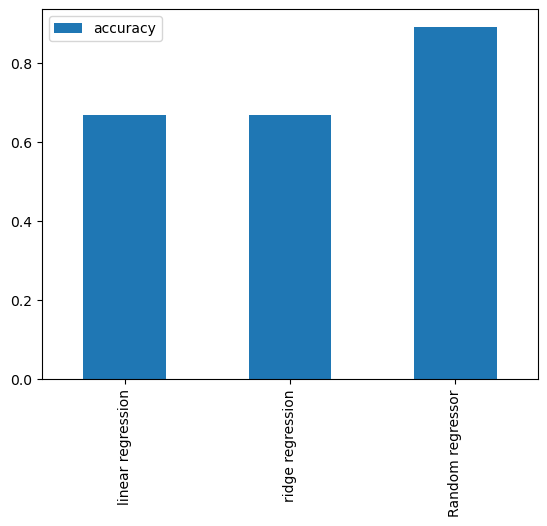

In [27]:
model_comparison = pd.DataFrame(Model_scores,index= ["accuracy"])
model_comparison.T.plot.bar();

The randomForest regressor indicate that it is the highest mean accuracy performing well

In [28]:
def checking_result_fitting(results, threshold):
    """
    Takes in a table from the function regression_model_performance_metrics()
    and a given threshold(int)

    Returns: (model) 'is overfitting', or 'is performing well', or 'is underfitting' as the case is
    """

    for index, row in results.iterrows():
        train_error = row["Train MAE"]
        test_error = row["Test MAE"]

        if test_error > train_error:
            if (test_error - train_error) > threshold:
                print(f"{index}: is overfitting.")
            else:
                print(f"{index}: is performing well.")
        else:
            print(f"{index}: is underfitting.")
models = regression_model_performance_metrics(model)
checking_result_fitting(models, threshold=5)

Fitting Model.....:linear regression
Predicting...
Scoring...
Fitting Model.....:ridge regression
Predicting...
Scoring...
Fitting Model.....:Random regressor
Predicting...
Scoring...
All done
linear regression: is underfitting.
ridge regression: is underfitting.
Random regressor: is performing well.


### let try to increase our Evaluate score higher using RandomsearchCv and Gridsearch CV

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [30]:
Linear = LinearRegression(copy_X=True,n_jobs=-1)
Rg = Ridge(random_state=42,copy_X=True,max_iter=1000)
models = RandomForestRegressor(n_estimators=100,random_state=42) 

In [31]:
#Random_Grid = {"n_estimators" : [10,50,100],
#        "max_depth" : [None,5,60],
#        "max_features" : ["sqrt", "log2"],
#        "min_samples_split" : np.arange(1,20,2),
#        "min_samples_leaf" : np.arange(2,20,1)} 

In [32]:
Random_Grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 10, 20],
    "max_features": ["sqrt", "log2"],
    "min_samples_split": np.arange(5, 30, 5),
    "min_samples_leaf": np.arange(5, 30, 5)
}

In [33]:
parameters = { "fit_intercept": [True, False]}

In [34]:
grid_rg = {"fit_intercept" : [True,False],
           "alpha" : [1,10,100,290,500],}

## Using RandomSearchCV for LinearRegression

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_pred(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    metric_dict = {
        "mean_square_error": round(mse, 2),
        "root_mean_square_error": round(rmse, 2),
        "mean_absolute_error": round(mae, 2),
        "r2": round(r2, 2)
    }

    return metric_dict


In [36]:
# let Evaluate using linear regression
np.random.seed(42)
LR = RandomizedSearchCV(Linear,param_distributions=parameters,
                       n_iter = 40,
                       cv =5,
                       verbose=True,n_jobs=-1);

In [37]:
LR.fit(X_train,y_train);

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [38]:
LR.best_params_

{'fit_intercept': True}

In [39]:
LR.score(X_test,y_test)

0.6687594935356321

In [40]:
#to predict
LR_train = LR.predict(X_train)
LR_y_preds = LR.predict(X_test)

In [41]:
LR_metric = evaluate_pred(y_test,LR_y_preds)
LR_metric

{'mean_square_error': 24.29,
 'root_mean_square_error': 4.93,
 'mean_absolute_error': 3.19,
 'r2': 0.67}

In [42]:
LR_train_metric = evaluate_pred(y_train,LR_train)
LR_train_metric

{'mean_square_error': 21.64,
 'root_mean_square_error': 4.65,
 'mean_absolute_error': 3.31,
 'r2': 0.75}

## Using RandomSearchCV For RandomForestRegressor

In [43]:
# Using Randomsearch Cv for RandomisedSearchCv for Random forest regressor
np.random.seed(42)
Randomforest= RandomizedSearchCV(models,
                        param_distributions=Random_Grid,
                        n_iter = 50,
                        cv= 5,
                        verbose=True)

In [44]:
Randomforest.fit(X_train,y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [45]:
Randomforest.best_params_

{'n_estimators': 150,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'log2',
 'max_depth': None}

In [46]:
# to score/evaluate
Randomforest.score(X_test,y_test)

0.814101853141709

In [47]:
Randomforest.score(X_train,y_train)

0.8999337301564818

In [48]:
RandomForest_train_error = Randomforest.predict(X_train)
Randomforest_y_pred = Randomforest.predict(X_test)

In [49]:
Randomforest_metric = evaluate_pred(y_test,Randomforest_y_pred)
Randomforest_metric

{'mean_square_error': 13.63,
 'root_mean_square_error': 3.69,
 'mean_absolute_error': 2.17,
 'r2': 0.81}

In [50]:
Random_train_metric=evaluate_pred(y_train,RandomForest_train_error)
Random_train_metric

{'mean_square_error': 8.69,
 'root_mean_square_error': 2.95,
 'mean_absolute_error': 1.88,
 'r2': 0.9}

## Using RandomsearchCv for Ridge regressor

In [51]:
RG = RandomizedSearchCV(Rg,param_distributions=grid_rg,random_state=42,n_iter=30,verbose=True,cv=5)

In [52]:
RG.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=Ridge(max_iter=1000, random_state=42),
                   n_iter=30,
                   param_distributions={'alpha': [1, 10, 100, 290, 500],
                                        'fit_intercept': [True, False]},
                   random_state=42, verbose=True)

In [53]:
RG.best_params_

{'fit_intercept': True, 'alpha': 1}

In [54]:
RG.get_params();

In [55]:
RG.score(X_test,y_test)

0.6684401592810276

In [56]:
# predicting using the Ridge ()
RG_train_pred = RG.predict(X_train)
RG_y_preds = RG.predict(X_test)

In [57]:
RG_metrics = evaluate_pred(y_test,RG_y_preds)
RG_metrics

{'mean_square_error': 24.31,
 'root_mean_square_error': 4.93,
 'mean_absolute_error': 3.19,
 'r2': 0.67}

In [58]:
RG_train_metric = evaluate_pred(y_train,RG_train_pred)
RG_train_metric

{'mean_square_error': 21.64,
 'root_mean_square_error': 4.65,
 'mean_absolute_error': 3.31,
 'r2': 0.75}

## using Gridsearch Cv for both linear and Random forest


In [59]:
grid_forest = {"n_estimators" : [150,200,250],
        "max_depth" : [None,10,15],
        "max_features" : ["sqrt","log2"],
        "min_samples_split" : [5,10],
        "min_samples_leaf" : [5,10]}

In [60]:
grid_lr1 = {"n_jobs" : [-1],
           "fit_intercept" : [True,False]}

In [61]:
grid_rg = {"max_iter" : [1000],
           "copy_X" : [True]}

## Using LinearRegression for GridSearchCv

In [62]:
# using Ridge 
rg_grid = GridSearchCV(Rg,param_grid=grid_rg,cv=5,verbose=True)

In [63]:
rg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=Ridge(max_iter=1000, random_state=42),
             param_grid={'copy_X': [True], 'max_iter': [1000]}, verbose=True)

In [64]:
rg_grid.score(X_test,y_test)

0.6684401592810276

In [65]:
# using linear regression
LR_grid = GridSearchCV(Linear,param_grid=grid_lr1,cv=5, verbose= True)

In [66]:
LR_grid.fit(X_train,y_train);

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [67]:
LR_grid.score(X_test,y_test)

0.6687594935356321

## Using GridsearchCv for RandomForestRegressor

In [68]:
# using Gridsearch for Randomforest
RF_grid = GridSearchCV(models,param_grid=grid_forest,cv=5,verbose = True)

In [69]:
RF_grid.fit(X_train,y_train);

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [70]:
RF_grid.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 150}

In [71]:
RF_grid.score(X_test,y_test)

0.814101853141709

In [72]:
Rf_grid_train_error = RF_grid.predict(X_train)
Rf_grid_y_preds = RF_grid.predict(X_test)


In [73]:
RF_metric = evaluate_pred(y_train,Rf_grid_train_error)
RF_metric

{'mean_square_error': 8.69,
 'root_mean_square_error': 2.95,
 'mean_absolute_error': 1.88,
 'r2': 0.9}

In [74]:
RF_metric = evaluate_pred(y_test,Rf_grid_y_preds)
RF_metric

{'mean_square_error': 13.63,
 'root_mean_square_error': 3.69,
 'mean_absolute_error': 2.17,
 'r2': 0.81}

In [75]:
# save the model
import pickle

In [76]:
pickle.dump(RF_grid, open("gridsearchCV-model.pkl", "wb"))

In [77]:
loaded_model= pickle.load(open("gridsearchCV-model.pkl", "rb"))
loaded_model.score(X_test,y_test)

0.814101853141709